In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_songs = pd.read_csv('../data/clean/all.csv')

In [3]:
all_songs.head()

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Flowers,Miley Cyrus,0.707,0.681,0.0,-4.325,1.0,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455.0,4.0,Yes
1,Kill Bill,SZA,0.644,0.728,8.0,-5.750,1.0,0.0351,0.0543,0.169000,0.1610,0.430,88.993,audio_features,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947.0,4.0,Yes
2,Last Night,Morgan Wallen,0.517,0.675,6.0,-5.382,1.0,0.0357,0.4590,0.000000,0.1510,0.518,203.853,audio_features,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855.0,4.0,Yes
3,Unholy,Sam Smith & Kim Petras,0.719,0.454,2.0,-7.384,1.0,0.0707,0.0138,0.000005,0.3180,0.224,131.007,audio_features,spotify:track:3bXRd0yVb5sw2WVblM5URR,https://api.spotify.com/v1/tracks/3bXRd0yVb5sw...,https://api.spotify.com/v1/audio-analysis/3bXR...,156943.0,4.0,Yes
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage",0.715,0.620,1.0,-6.005,0.0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,audio_features,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520.0,4.0,Yes


In [4]:
all_songs.isna().sum()

song                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
hot                 0
dtype: int64

In [5]:
all_songs.shape

(1959, 20)

### get useful numerical features

In [6]:
all_songs.dtypes

song                 object
artist               object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
hot                  object
dtype: object

In [7]:
X = all_songs.select_dtypes('number')

In [8]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.707,0.681,0.0,-4.325,1.0,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455.0,4.0
1,0.644,0.728,8.0,-5.750,1.0,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947.0,4.0
2,0.517,0.675,6.0,-5.382,1.0,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855.0,4.0
3,0.719,0.454,2.0,-7.384,1.0,0.0707,0.0138,0.000005,0.3180,0.224,131.007,156943.0,4.0
4,0.715,0.620,1.0,-6.005,0.0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520.0,4.0


In [9]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

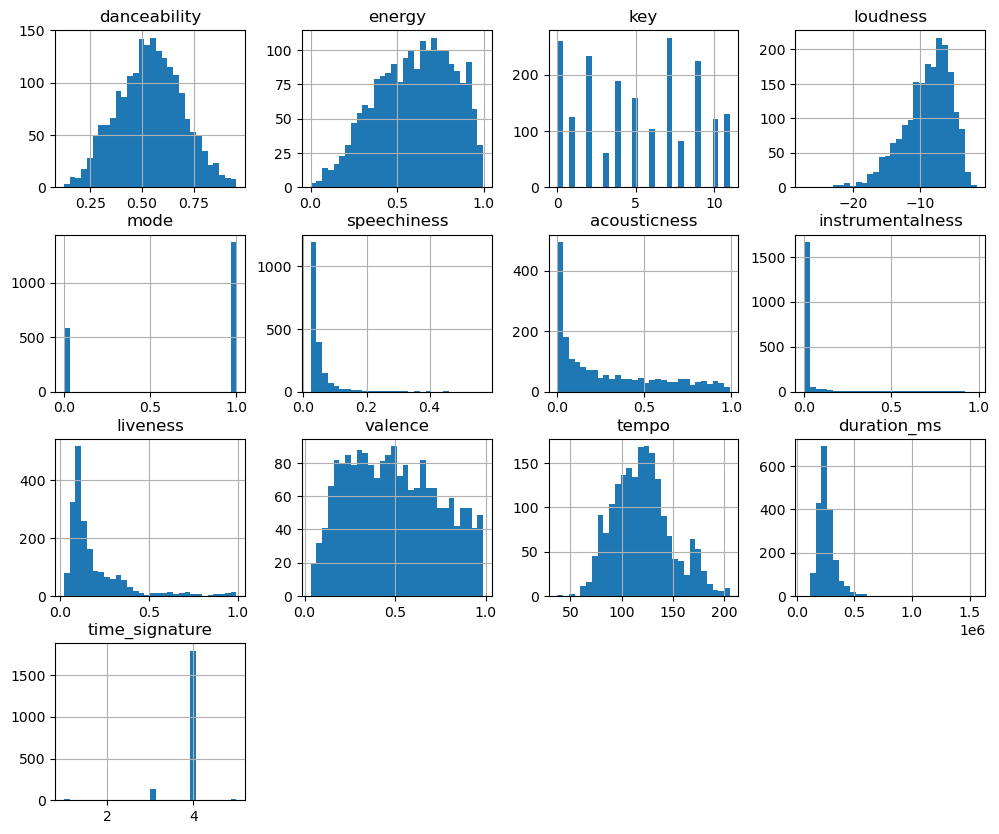

In [10]:
# Check the distribution of all columns
X.hist(bins = 30, figsize = (12, 10));

In [11]:
#drop unnecessary features
X =X.drop(['mode','duration_ms','time_signature'],axis=1)

In [12]:
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950


### scaling

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
filename = "../scalers/scaler.pickle" 

with open(filename, "wb") as file:
        pickle.dump(scaler,file)


In [17]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.083900,0.372064,-1.473657,1.275047,0.316566,-0.767080,-0.323069,-0.919250,0.613853,-0.087221
1,0.679514,0.586231,0.800831,0.880128,-0.337188,-0.797798,0.759626,-0.191036,-0.261666,-1.115537
2,-0.135677,0.344723,0.232209,0.982114,-0.324814,0.599011,-0.323102,-0.247575,0.095027,2.956460
3,1.160926,-0.662321,-0.905035,0.427286,0.396996,-0.937583,-0.323071,0.696615,-1.096652,0.373936
4,1.135251,0.094101,-1.189346,0.809458,-0.062900,0.454049,-0.323102,-0.636558,-1.307425,-0.797995


In [18]:
X_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03,1.959000e+03
mean,-2.630191e-16,2.505228e-16,2.724835e-16,-1.141960e-17,2.776974e-18,-2.606956e-16,1.323313e-17,9.926267e-17,-1.810134e-16,3.815789e-16
std,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00,1.000255e+00
min,-2.664694e+00,-2.730996e+00,-1.473657e+00,-5.083297e+00,-5.970392e-01,-9.851965e-01,-3.231018e-01,-9.740917e-01,-1.870027e+00,-2.954742e+00
25%,-6.941146e-01,-7.580124e-01,-9.050352e-01,-5.665252e-01,-4.258672e-01,-8.752836e-01,-3.231018e-01,-5.752140e-01,-8.331854e-01,-7.284383e-01
50%,1.837508e-02,9.410128e-02,-5.210193e-02,1.584640e-01,-3.041907e-01,-3.777544e-01,-3.224701e-01,-3.945741e-01,-5.899982e-02,-4.109831e-02
75%,6.923518e-01,8.117906e-01,8.008314e-01,7.457163e-01,-2.577839e-02,7.129096e-01,-2.932467e-01,2.103857e-01,7.942257e-01,5.567612e-01
max,2.682188e+00,1.802885e+00,1.653765e+00,2.047427e+00,1.069413e+01,2.435192e+00,6.000283e+00,4.512950e+00,1.987931e+00,3.027222e+00


### choosing K

In [21]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "../models/kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file: 
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 31548.546974044788
Iteration 1, inertia 16661.870125515296
Iteration 2, inertia 16199.16475462796
Iteration 3, inertia 16133.425844164642
Iteration 4, inertia 16114.294854634012
Iteration 5, inertia 16109.564168231125
Iteration 6, inertia 16108.908869090461
Converged at iteration 6: center shift 9.769752171117817e-05 within tolerance 9.999999999999986e-05.
Initialization complete
Iteration 0, inertia 25718.22457768608
Iteration 1, inertia 16477.64968176995
Iteration 2, inertia 16200.299121910723
Iteration 3, inertia 16134.892193944346
Iteration 4, inertia 16113.880385079494
Iteration 5, inertia 16109.919060669454
Iteration 6, inertia 16109.300862511493
Iteration 7, inertia 16109.056664905725
Converged at iteration 7: center shift 4.4258776813987866e-05 within tolerance 9.999999999999986e-05.
Initialization complete
Iteration 0, inertia 24572.54689973581
Iteration 1, inertia 18239.02878116777
Iterat

Iteration 15, inertia 13935.645227547011
Iteration 16, inertia 13931.007797866077
Iteration 17, inertia 13924.133796788468
Iteration 18, inertia 13908.296019022526
Iteration 19, inertia 13875.47095701625
Iteration 20, inertia 13831.535157607963
Iteration 21, inertia 13788.630609429907
Iteration 22, inertia 13754.334638874048
Iteration 23, inertia 13715.880785272187
Iteration 24, inertia 13686.02946812245
Iteration 25, inertia 13661.405599346846
Iteration 26, inertia 13641.02881224824
Iteration 27, inertia 13635.08671022088
Iteration 28, inertia 13631.930139187501
Iteration 29, inertia 13631.179848488595
Iteration 30, inertia 13630.787177945465
Iteration 31, inertia 13630.42243557908
Iteration 32, inertia 13630.346873542996
Converged at iteration 32: strict convergence.
Initialization complete
Iteration 0, inertia 18893.638654179522
Iteration 1, inertia 14386.07879826353
Iteration 2, inertia 14091.16051217358
Iteration 3, inertia 14021.7792754508
Iteration 4, inertia 13991.61262783216
I

Iteration 18, inertia 12690.119297235746
Iteration 19, inertia 12655.14647529912
Iteration 20, inertia 12605.609978759596
Iteration 21, inertia 12546.191615758715
Iteration 22, inertia 12480.232663491954
Iteration 23, inertia 12410.681987694754
Iteration 24, inertia 12356.437263412203
Iteration 25, inertia 12328.579022850672
Iteration 26, inertia 12320.910608642145
Iteration 27, inertia 12318.173779965233
Iteration 28, inertia 12317.047481705104
Converged at iteration 28: center shift 8.703652095534638e-05 within tolerance 9.999999999999986e-05.
Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 16312.24303410612
Iteration 1, inertia 13631.263407057362
Iteration 2, inertia 13259.059933051296
Iteration 3, inertia 13013.891604501925
Iteration 4, inertia 12828.562713697447
Iteration 5, inertia 12671.64621417916
Iteration 6, inertia 12487.92311138097
Iteration 7, inertia 12229.108901492604
Iteration 8, inertia 12102.978933435936
Iteration 9, inertia 11

Iteration 13, inertia 10622.703457134772
Iteration 14, inertia 10617.313875620694
Iteration 15, inertia 10611.687366916713
Iteration 16, inertia 10601.824234627999
Iteration 17, inertia 10585.534778389145
Iteration 18, inertia 10572.776186418838
Iteration 19, inertia 10566.027549776572
Iteration 20, inertia 10563.150066915196
Iteration 21, inertia 10561.413571582943
Iteration 22, inertia 10560.632975465785
Iteration 23, inertia 10560.24724959139
Iteration 24, inertia 10560.060639320718
Converged at iteration 24: center shift 5.079337710461862e-05 within tolerance 9.999999999999986e-05.
Initialization complete
Iteration 0, inertia 16899.4415854885
Iteration 1, inertia 11895.838749092109
Iteration 2, inertia 11335.820052508643
Iteration 3, inertia 11179.960183252373
Iteration 4, inertia 11106.27440112638
Iteration 5, inertia 11031.22657448318
Iteration 6, inertia 10891.127703556474
Iteration 7, inertia 10740.716299253447
Iteration 8, inertia 10651.263652768881
Iteration 9, inertia 10615.

Iteration 31, inertia 10052.465746302907
Iteration 32, inertia 10052.050984420275
Iteration 33, inertia 10051.61984624761
Iteration 34, inertia 10050.894713125886
Iteration 35, inertia 10050.245979698337
Iteration 36, inertia 10050.04029133006
Iteration 37, inertia 10049.843398355239
Iteration 38, inertia 10049.800757875877
Iteration 39, inertia 10049.742959221003
Converged at iteration 39: strict convergence.
Initialization complete
Iteration 0, inertia 14340.975725595721
Iteration 1, inertia 10876.978063814398
Iteration 2, inertia 10328.544898474
Iteration 3, inertia 10257.761764616585
Iteration 4, inertia 10229.72075279047
Iteration 5, inertia 10212.34585644323
Iteration 6, inertia 10196.95724134121
Iteration 7, inertia 10187.363893084534
Iteration 8, inertia 10180.996073850178
Iteration 9, inertia 10172.642031731182
Iteration 10, inertia 10162.812626783565
Iteration 11, inertia 10152.951299823875
Iteration 12, inertia 10146.189127689864
Iteration 13, inertia 10140.62327301592
Itera

Iteration 50, inertia 9628.895320867738
Iteration 51, inertia 9627.922330045534
Iteration 52, inertia 9627.444046712197
Iteration 53, inertia 9627.411452192346
Converged at iteration 53: strict convergence.
Initialization complete
Iteration 0, inertia 13150.551399653434
Iteration 1, inertia 10246.753510575843
Iteration 2, inertia 9910.734446154838
Iteration 3, inertia 9780.31343915208
Iteration 4, inertia 9712.774727486027
Iteration 5, inertia 9688.269486463
Iteration 6, inertia 9676.37984040767
Iteration 7, inertia 9665.310230618037
Iteration 8, inertia 9657.322140559256
Iteration 9, inertia 9652.120700468451
Iteration 10, inertia 9647.08776058418
Iteration 11, inertia 9644.200104334852
Iteration 12, inertia 9641.035118967315
Iteration 13, inertia 9637.788740577049
Iteration 14, inertia 9634.18185458551
Iteration 15, inertia 9631.590197243118
Iteration 16, inertia 9629.686590025976
Iteration 17, inertia 9628.546100222566
Iteration 18, inertia 9627.770113960541
Iteration 19, inertia 96

Iteration 12, inertia 9405.030117021395
Iteration 13, inertia 9398.233372814946
Iteration 14, inertia 9394.309484099495
Iteration 15, inertia 9392.912025091542
Iteration 16, inertia 9392.018791022649
Iteration 17, inertia 9391.917269384001
Iteration 18, inertia 9391.595693310039
Iteration 19, inertia 9391.352664402324
Iteration 20, inertia 9391.119544466073
Iteration 21, inertia 9390.910393980474
Iteration 22, inertia 9390.489195949918
Iteration 23, inertia 9390.28291043729
Iteration 24, inertia 9390.134364345413
Iteration 25, inertia 9390.019759439332
Iteration 26, inertia 9389.641653232673
Iteration 27, inertia 9388.978074163104
Iteration 28, inertia 9388.776282171095
Converged at iteration 28: center shift 8.3952751300054e-05 within tolerance 9.999999999999986e-05.
Training a K-Means model with 11 clusters! 

Initialization complete
Iteration 0, inertia 12731.254855077685
Iteration 1, inertia 10108.7119735304
Iteration 2, inertia 9825.553260181108
Iteration 3, inertia 9654.927617771

Iteration 30, inertia 9059.813725864515
Iteration 31, inertia 9058.16178407133
Iteration 32, inertia 9056.956727045983
Iteration 33, inertia 9055.118700542378
Iteration 34, inertia 9053.358454298575
Iteration 35, inertia 9052.101381016202
Iteration 36, inertia 9049.585317929468
Iteration 37, inertia 9048.00921005016
Iteration 38, inertia 9046.730325593646
Iteration 39, inertia 9045.317703413697
Iteration 40, inertia 9044.522574518578
Iteration 41, inertia 9043.268166012946
Iteration 42, inertia 9042.08257189162
Iteration 43, inertia 9041.042646736758
Iteration 44, inertia 9039.901579409252
Iteration 45, inertia 9039.642599901366
Iteration 46, inertia 9039.519538970624
Converged at iteration 46: strict convergence.
Initialization complete
Iteration 0, inertia 13312.533242935442
Iteration 1, inertia 9572.128953289655
Iteration 2, inertia 9211.390447662041
Iteration 3, inertia 9135.800513822836
Iteration 4, inertia 9105.67111511495
Iteration 5, inertia 9092.832501742523
Iteration 6, inert

Iteration 11, inertia 8761.339769043305
Iteration 12, inertia 8759.076121748834
Iteration 13, inertia 8756.083005016251
Iteration 14, inertia 8753.565927692765
Iteration 15, inertia 8750.259025037882
Iteration 16, inertia 8749.577991652255
Iteration 17, inertia 8748.89442429541
Iteration 18, inertia 8748.635172261771
Iteration 19, inertia 8748.515854133806
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 11338.355585755986
Iteration 1, inertia 9374.63344997666
Iteration 2, inertia 9104.223181829831
Iteration 3, inertia 8981.251738465118
Iteration 4, inertia 8911.927174207445
Iteration 5, inertia 8877.257420726888
Iteration 6, inertia 8855.961540634318
Iteration 7, inertia 8844.079609839247
Iteration 8, inertia 8836.529234690432
Iteration 9, inertia 8832.832287380825
Iteration 10, inertia 8830.667934907216
Iteration 11, inertia 8829.528793338979
Iteration 12, inertia 8828.90430434734
Iteration 13, inertia 8828.4807180006
Iteration 14, inertia 8

Initialization complete
Iteration 0, inertia 12285.822379139525
Iteration 1, inertia 9454.42309516225
Iteration 2, inertia 9034.135043459988
Iteration 3, inertia 8874.802662016027
Iteration 4, inertia 8780.525569056725
Iteration 5, inertia 8705.148670875535
Iteration 6, inertia 8651.67292479892
Iteration 7, inertia 8623.040117038843
Iteration 8, inertia 8604.995799656564
Iteration 9, inertia 8588.775256440851
Iteration 10, inertia 8579.588008369119
Iteration 11, inertia 8573.98001100285
Iteration 12, inertia 8570.076872361722
Iteration 13, inertia 8566.49626508653
Iteration 14, inertia 8562.046461914058
Iteration 15, inertia 8558.009679853163
Iteration 16, inertia 8554.255645899995
Iteration 17, inertia 8551.26594002508
Iteration 18, inertia 8547.436038133377
Iteration 19, inertia 8544.54205145279
Iteration 20, inertia 8541.84718609193
Iteration 21, inertia 8540.412047575253
Iteration 22, inertia 8538.498770023787
Iteration 23, inertia 8537.366541220885
Iteration 24, inertia 8536.91277

Iteration 16, inertia 8346.982822011734
Iteration 17, inertia 8342.239765187605
Iteration 18, inertia 8338.187512618559
Iteration 19, inertia 8334.832495821385
Iteration 20, inertia 8333.359101006345
Iteration 21, inertia 8332.321651050603
Iteration 22, inertia 8331.60575787086
Iteration 23, inertia 8331.124910444349
Iteration 24, inertia 8330.291473054738
Iteration 25, inertia 8329.935135528453
Iteration 26, inertia 8329.852616307931
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 11295.765800615347
Iteration 1, inertia 9058.297671357072
Iteration 2, inertia 8774.579946463648
Iteration 3, inertia 8648.49474906546
Iteration 4, inertia 8573.705113756241
Iteration 5, inertia 8537.981310326024
Iteration 6, inertia 8521.716368620393
Iteration 7, inertia 8508.429325653193
Iteration 8, inertia 8495.931749938616
Iteration 9, inertia 8490.87268342725
Iteration 10, inertia 8483.500665680207
Iteration 11, inertia 8473.573300168116
Iteration 12, inertia

Iteration 5, inertia 8438.715688436554
Iteration 6, inertia 8416.490919456188
Iteration 7, inertia 8393.527002900724
Iteration 8, inertia 8372.64547291939
Iteration 9, inertia 8348.558556402584
Iteration 10, inertia 8321.725843820217
Iteration 11, inertia 8294.900964746506
Iteration 12, inertia 8276.761972338605
Iteration 13, inertia 8265.923073406966
Iteration 14, inertia 8258.38384101246
Iteration 15, inertia 8254.02984629538
Iteration 16, inertia 8251.691922625132
Iteration 17, inertia 8249.71827480482
Iteration 18, inertia 8247.840518411922
Iteration 19, inertia 8246.945555728114
Iteration 20, inertia 8245.288767740949
Iteration 21, inertia 8242.93589459694
Iteration 22, inertia 8241.167950806423
Iteration 23, inertia 8239.437978726966
Iteration 24, inertia 8237.864307870852
Iteration 25, inertia 8236.73961244696
Iteration 26, inertia 8236.29592691349
Iteration 27, inertia 8235.669979519325
Iteration 28, inertia 8235.035893163993
Iteration 29, inertia 8234.058050500968
Iteration 30

Iteration 19, inertia 8081.171399916548
Iteration 20, inertia 8080.4163801333925
Iteration 21, inertia 8079.7707338625505
Iteration 22, inertia 8079.401833817341
Iteration 23, inertia 8078.46825314122
Iteration 24, inertia 8076.0612405178
Iteration 25, inertia 8074.407419384114
Iteration 26, inertia 8072.7520666524515
Iteration 27, inertia 8071.686969336179
Iteration 28, inertia 8070.470031492981
Iteration 29, inertia 8069.916046904578
Iteration 30, inertia 8069.749778300484
Iteration 31, inertia 8069.66064159252
Iteration 32, inertia 8069.558582685885
Iteration 33, inertia 8069.514230862738
Converged at iteration 33: strict convergence.
Initialization complete
Iteration 0, inertia 11175.175818515292
Iteration 1, inertia 8802.35133890174
Iteration 2, inertia 8405.974197475229
Iteration 3, inertia 8224.094493073117
Iteration 4, inertia 8137.457668323607
Iteration 5, inertia 8098.137677778889
Iteration 6, inertia 8081.078076677773
Iteration 7, inertia 8065.511015653659
Iteration 8, inert

Iteration 11, inertia 7869.90973180485
Iteration 12, inertia 7858.69321711894
Iteration 13, inertia 7851.237919670884
Iteration 14, inertia 7846.289743354205
Iteration 15, inertia 7842.691576156186
Iteration 16, inertia 7838.002373098683
Iteration 17, inertia 7834.30960913425
Iteration 18, inertia 7832.064611025184
Iteration 19, inertia 7829.566530228356
Iteration 20, inertia 7826.085412218482
Iteration 21, inertia 7822.914276551557
Iteration 22, inertia 7819.19150237595
Iteration 23, inertia 7817.02253286438
Iteration 24, inertia 7813.598537962954
Iteration 25, inertia 7810.555254485281
Iteration 26, inertia 7809.056772432871
Iteration 27, inertia 7807.6307634048235
Iteration 28, inertia 7807.104156695354
Iteration 29, inertia 7806.140622758414
Iteration 30, inertia 7805.158281009799
Iteration 31, inertia 7804.087887524406
Iteration 32, inertia 7801.648995322435
Iteration 33, inertia 7799.919525713187
Iteration 34, inertia 7799.1116306357735
Iteration 35, inertia 7798.926346228025
Ite

Initialization complete
Iteration 0, inertia 10519.776328753995
Iteration 1, inertia 8252.392354205358
Iteration 2, inertia 7993.64654224211
Iteration 3, inertia 7876.611439256683
Iteration 4, inertia 7814.135734545919
Iteration 5, inertia 7769.698885187163
Iteration 6, inertia 7744.730011776672
Iteration 7, inertia 7732.616274110875
Iteration 8, inertia 7728.406890193164
Iteration 9, inertia 7725.308717354674
Iteration 10, inertia 7723.247749478817
Iteration 11, inertia 7719.390812123847
Iteration 12, inertia 7712.653944055113
Iteration 13, inertia 7705.5628517012865
Iteration 14, inertia 7702.332312887954
Iteration 15, inertia 7699.840371243079
Iteration 16, inertia 7699.405969780406
Iteration 17, inertia 7699.191982502542
Iteration 18, inertia 7698.474319979696
Iteration 19, inertia 7697.146439673101
Iteration 20, inertia 7696.812611154801
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 10761.89784612113
Iteration 1, inertia 8364.209748870

Iteration 13, inertia 7633.985048201307
Iteration 14, inertia 7630.656365751853
Iteration 15, inertia 7624.301652087707
Iteration 16, inertia 7619.714046130024
Iteration 17, inertia 7616.995136311684
Iteration 18, inertia 7615.479751788598
Iteration 19, inertia 7614.416368876011
Iteration 20, inertia 7613.357441621551
Iteration 21, inertia 7612.712611854137
Iteration 22, inertia 7612.371603067833
Iteration 23, inertia 7611.69171351066
Iteration 24, inertia 7611.393138674499
Iteration 25, inertia 7611.091841027947
Iteration 26, inertia 7610.708914480461
Iteration 27, inertia 7610.059206026855
Iteration 28, inertia 7609.568030642073
Iteration 29, inertia 7609.053468057872
Iteration 30, inertia 7608.861316541249
Iteration 31, inertia 7608.69723404103
Iteration 32, inertia 7608.329596608562
Iteration 33, inertia 7608.198923339595
Iteration 34, inertia 7607.718404445002
Iteration 35, inertia 7607.251072184485
Iteration 36, inertia 7606.893026302515
Iteration 37, inertia 7606.801626122969
Co

Iteration 22, inertia 7438.636704050533
Iteration 23, inertia 7438.392262371981
Iteration 24, inertia 7438.059012932364
Iteration 25, inertia 7437.736837228176
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 10577.07502638159
Iteration 1, inertia 8231.212305414514
Iteration 2, inertia 7808.281365932769
Iteration 3, inertia 7669.058537020463
Iteration 4, inertia 7610.314079966587
Iteration 5, inertia 7579.396860958525
Iteration 6, inertia 7556.969726675248
Iteration 7, inertia 7542.102321275948
Iteration 8, inertia 7526.945070287273
Iteration 9, inertia 7518.014491547348
Iteration 10, inertia 7510.834739789452
Iteration 11, inertia 7507.240578441992
Iteration 12, inertia 7504.260091983875
Iteration 13, inertia 7501.368580129501
Iteration 14, inertia 7498.543250945236
Iteration 15, inertia 7494.778447856621
Iteration 16, inertia 7492.201065783811
Iteration 17, inertia 7490.783811956197
Iteration 18, inertia 7490.151757675276
Iteration 19, inert

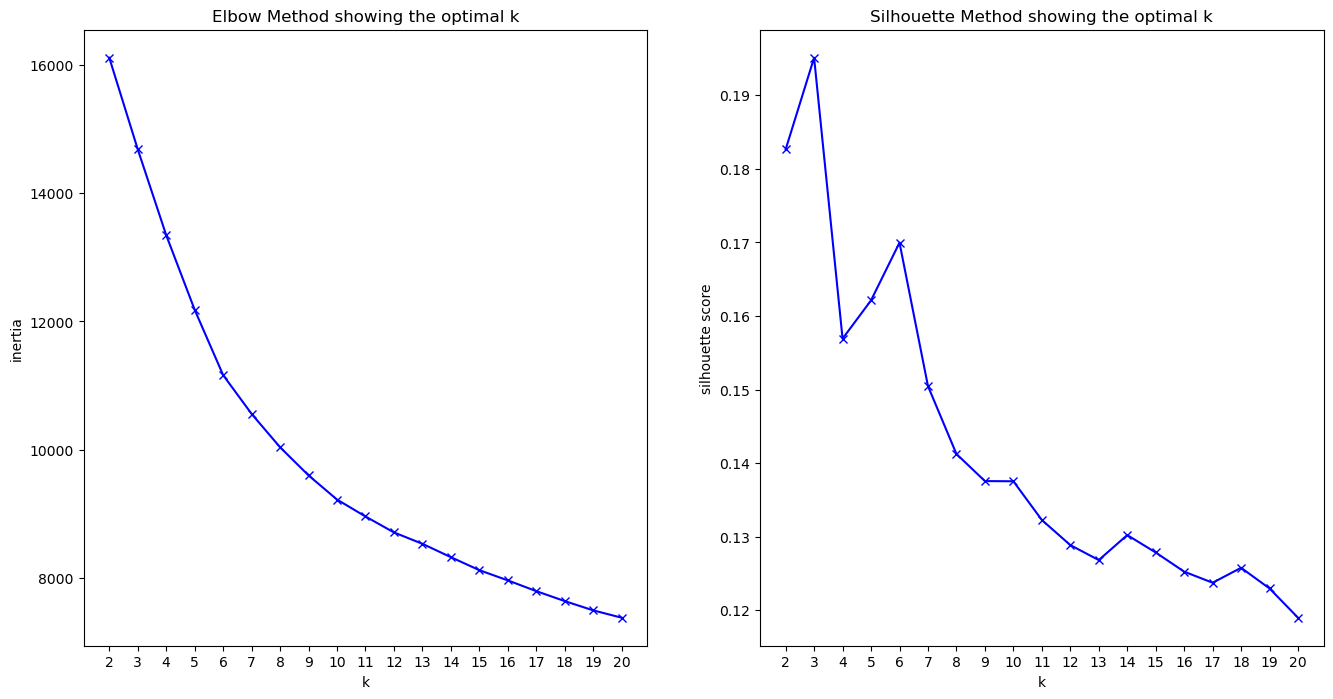

,nr_of_clusters[K]silhouette
2,0.182644
3,0.195118
4,0.156919
5,0.162123
6,0.169973
7,0.150468
8,0.141241
9,0.137551
10,0.137527
11,0.132264


In [22]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')
plt.show()

import numpy as np
number_of_clusters = list(np.arange(2,21))
number_of_clusters
silhouette

df_silhouete_number_of_clusters = pd.DataFrame(silhouette,number_of_clusters, columns=['nr_of_clusters[K]''silhouette'])
df_silhouete_number_of_clusters


CHOSING K
We don't have a clear elbow so it's impossible to see the best k from this method.
In other way, with the silhouette score, we can spot 5 possible values that can be the best k to choose(values betwenn peaks): 
    --> 4, 5, 6, 13 , 17
    --> 13 and 17 have the worst score
    --> 4 with this one, maybe our clusterings get too little
    --> The best choice can it be k= 6 since we have the best score (0,17) and it seems that we have enough clusters/groups 
         for the purpose of our song_recommender

### clustering songs with K-Means

In [25]:
# loadK_means_model_with13_clusters
kmeans_13 = KMeans(n_clusters=13, random_state=123)
kmeans_13.fit(X_scaled_df)

KMeans(n_clusters=13, random_state=123)

In [26]:
clusters13 = kmeans_13.predict(X_scaled_df)
#clusters
pd.Series(clusters13).value_counts().sort_index()

0     191
1     168
2      48
3     179
4     169
5      94
6     182
7     216
8     179
9      79
10    174
11    227
12     53
dtype: int64

In [27]:
#X_df = pd.DataFrame(X)
X["KMeans_13"] = clusters13
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,11
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993,0
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,4
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007,11
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,11


In [28]:
X[X['KMeans_13'] == 7 ].sample(5)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13
793,0.673,0.735,5.0,-4.733,0.0457,0.28600,0.00000,0.2420,0.754,115.744,7
1220,0.920,0.654,11.0,-3.051,0.0401,0.02360,0.01530,0.0360,0.847,117.046,7
1000,0.669,0.673,7.0,-9.754,0.0248,0.20300,0.02710,0.1640,0.867,132.680,7
1254,0.744,0.798,7.0,-5.981,0.0364,0.17500,0.00367,0.2600,0.890,125.061,7
1607,0.615,0.702,7.0,-9.686,0.0278,0.00746,0.00431,0.0608,0.734,96.987,7


In [29]:
kmeans.inertia_

7384.526287637624

In [30]:
X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,11
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993,0
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,4
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007,11
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,11
...,...,...,...,...,...,...,...,...,...,...,...
1954,0.695,0.295,9.0,-8.672,0.0609,0.8430,0.000002,0.0856,0.732,93.574,8
1955,0.494,0.756,0.0,-8.492,0.0499,0.7330,0.005050,0.7600,0.949,86.895,12
1956,0.534,0.803,10.0,-9.129,0.0743,0.7410,0.000061,0.3070,0.969,167.983,7
1957,0.454,0.260,8.0,-13.193,0.0401,0.5390,0.000780,0.0675,0.598,174.322,10


In [31]:
#Clustering songs with K-Means with the best chosen K_number (K=6)

kmeans_6 = KMeans(n_clusters=6, random_state=123)
kmeans_6.fit(X_scaled_df)

clusters6 = kmeans_6.predict(X_scaled_df)
#clusters
pd.Series(clusters13).value_counts().sort_index()
X["KMeans_6"] = clusters6
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,11,3
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993,0,3
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,4,2
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007,11,2
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,11,3


In [32]:
X['KMeans_6'].value_counts()

3    676
1    520
2    474
0    128
5    102
4     59
Name: KMeans_6, dtype: int64

In [33]:
display(X[X['KMeans_6'] == 0 ].sample(5)) #--> louder as 1, but much more liveness ['Do you want to relax and feel happy?']
display(X[X['KMeans_6'] == 1 ].sample(5)) #--> less loudness and energie songs than2, the most acoustic ones ['Do you want to relax?']
display(X[X['KMeans_6'] == 2 ].sample(5)) #--> greater loudness and energie songs than1 ['Want to start your day with energie and really motivated?']
display(X[X['KMeans_6'] == 3 ].sample(5)) #--> the most dancable and with energy songs ['Wanna Dance?']
display(X[X['KMeans_6'] == 4 ].sample(5)) #--> the most dancable and with energy songs, with more speechiness and valence ['Wanna Dance and Sing?']
display(X[X['KMeans_6'] == 5 ].sample(5)) #--> the most intrumental songs with a lot of energy ['Do you like good insturmentals? Want to ear a guitar screaming or a awesome bass line, or instead feel a living drums?']

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
1120,0.602,0.853,4.0,-8.387,0.0251,0.01310,0.000018,0.618,0.654,95.320,9,0
1318,0.351,0.947,5.0,-4.965,0.0503,0.00382,0.000002,0.559,0.859,153.762,9,0
1249,0.556,0.769,9.0,-10.536,0.0422,0.28900,0.502000,0.793,0.635,82.898,9,0
437,0.463,0.601,6.0,-8.653,0.0824,0.80400,0.000012,0.917,0.762,149.590,12,0
1315,0.588,0.908,9.0,-8.117,0.0431,0.15100,0.000248,0.596,0.926,143.960,9,0


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
1246,0.308,0.2620,5.0,-18.685,0.0309,0.149,0.000000,0.0665,0.1910,175.655,10,1
683,0.408,0.4140,2.0,-11.083,0.0297,0.282,0.000000,0.1530,0.5760,107.469,3,1
1356,0.494,0.0644,4.0,-23.939,0.0402,0.833,0.000000,0.0969,0.0622,103.757,1,1
466,0.754,0.3090,0.0,-13.925,0.0334,0.339,0.282000,0.0947,0.4820,113.344,6,1
613,0.505,0.5910,7.0,-8.397,0.0302,0.799,0.000002,0.1740,0.3900,146.174,10,1


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
120,0.348,0.431,7.0,-10.546,0.0333,0.160000,0.000000,0.0969,0.257,193.753,4,2
421,0.162,0.512,7.0,-8.346,0.0439,0.316000,0.064500,0.0977,0.335,161.965,4,2
1679,0.531,0.856,10.0,-3.241,0.0288,0.003690,0.000137,0.1300,0.440,90.015,0,2
195,0.506,0.947,7.0,-5.157,0.0612,0.000021,0.005690,0.3010,0.656,125.993,0,2
660,0.576,0.588,5.0,-9.553,0.0308,0.012400,0.000177,0.1480,0.316,127.969,0,2


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
407,0.556,0.913,0.0,-2.360,0.0437,0.0193,0.000009,0.3460,0.730,96.184,11,3
1366,0.541,0.960,0.0,-2.947,0.0505,0.0663,0.000002,0.3440,0.812,122.803,11,3
1296,0.587,0.572,2.0,-9.656,0.0413,0.3630,0.087100,0.0915,0.471,115.466,6,3
695,0.661,0.651,7.0,-3.771,0.0499,0.1170,0.000013,0.0560,0.368,87.460,0,3
1167,0.615,0.928,5.0,-6.070,0.1060,0.0648,0.006100,0.2670,0.552,125.361,11,3


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
91,0.624,0.654,8.0,-6.582,0.183,0.57700,0.000000,0.1040,0.564,73.898,2,4
256,0.775,0.705,4.0,-9.344,0.192,0.45500,0.000024,0.0551,0.610,130.663,2,4
69,0.738,0.666,5.0,-6.970,0.455,0.00361,0.000000,0.1070,0.215,161.734,2,4
75,0.663,0.694,10.0,-8.627,0.171,0.02530,0.000000,0.0698,0.525,167.953,2,4
634,0.756,0.724,7.0,-7.706,0.235,0.04580,0.001390,0.9480,0.513,134.935,9,4


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans_13,KMeans_6
1668,0.759,0.563,0.0,-8.643,0.0338,0.699000,0.619,0.1440,0.8600,136.670,5,5
1571,0.430,0.295,2.0,-14.255,0.0283,0.698000,0.569,0.2260,0.1590,74.014,1,5
182,0.296,0.669,0.0,-5.364,0.0452,0.030000,0.831,0.1540,0.6790,74.692,5,5
238,0.483,0.192,4.0,-15.378,0.0469,0.991000,0.908,0.1060,0.0542,100.848,5,5
1074,0.332,0.725,11.0,-5.809,0.1160,0.000209,0.607,0.0767,0.4220,182.364,5,5
